## Criando um modelo de predição linear

In [72]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

### Eliminam-se as colunas de identificação dos jogos

In [74]:
df2 = df.drop(columns='gameId')

In [75]:
df2

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


### Criam-se os arrays de features e target a partir do Data Frame

In [76]:
X = df2.drop(columns=['blueTotalGold','blueCSPerMin','blueGoldDiff','redGoldDiff']).to_numpy()
y = df2['blueTotalGold'].to_numpy()

### Separam-se os dados em dados de teste e treino

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Regressão Linear por Mínimos Quadrados

In [80]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [81]:
y_predict = linear.predict(X_test)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

1.0

In [83]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,14377,14377.0
1,13340,13340.0
2,15885,15885.0
3,15947,15947.0
4,15392,15392.0
5,18933,18933.0
6,22745,22745.0
7,20169,20169.0
8,18565,18565.0
9,15885,15885.0


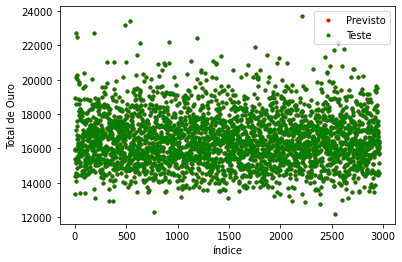

In [84]:
import matplotlib.pyplot as plt
plt.plot(range(y_predict.shape[0]), y_predict, 'r.')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Regressão de Ridge

In [85]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [86]:
y_predict = ridge.predict(X_test)

In [87]:
ridge.score(X_test, y_test)

0.9999999999999998

In [88]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,14377,14376.999957
1,13340,13340.000034
2,15885,15884.999991
3,15947,15947.000032
4,15392,15392.000003
5,18933,18933.000022
6,22745,22744.999924
7,20169,20168.999952
8,18565,18565.000009
9,15885,15884.999983


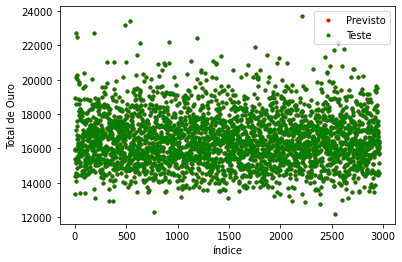

In [89]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r.')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Lasso

In [90]:
lasso = linear_model.Lasso(alpha=0.1, max_iter=1330)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=1330)

In [91]:
y_predict = lasso.predict(X_test)

In [92]:
lasso.score(X_test, y_test)

0.9999999843515793

In [93]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,14377,14376.962292
1,13340,13339.702995
2,15885,15884.959820
3,15947,15947.129043
4,15392,15392.261892
5,18933,18932.732004
6,22745,22744.922580
7,20169,20169.054885
8,18565,18564.888718
9,15885,15885.244608


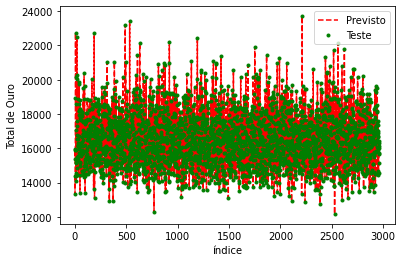

In [94]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Elastic Net

In [95]:
enet = linear_model.ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [96]:
y_predict = enet.predict(X_test)

In [97]:
enet.score(X_test, y_test)

0.9999999999801953

In [98]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,14377,14377.011268
1,13340,13340.001744
2,15885,15885.001023
3,15947,15947.010277
4,15392,15392.003836
5,18933,18932.994107
6,22745,22745.014957
7,20169,20168.999213
8,18565,18565.001827
9,15885,15885.012745


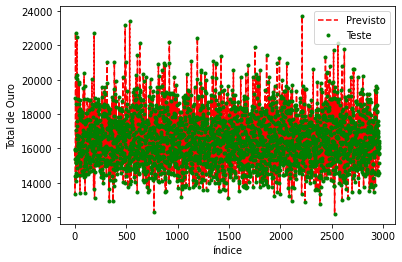

In [99]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

### Supõe-se que esteja acontecendo overfitting. Dessa forma, técnicas como PCA e Cross-validation podem ser utilizadas a fim de se reduzir o overfitting.